# Analisando as vendas da empresa
- Vamos utilizar a base disponível em:
    - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv
    - Essa é uma base de dados real, porém anonimizada
- Fizemos alguns tratamentos nos dados e disponibilizamos em 3 arquivos:
    - `base_vendas.xlsx`: todos os dados de venda por item da empresa, onde cada linha representa 1 item vendido
    - `base_pagamentos.xlsx`: base com as formas de pagamento usado naquela compra
    - `olist_order_reviews_dataset.csv`: base com o review dos pedidos, exatamente como baixada do Kaggle, onde cada linha representa a avaliação de uma pedido
    

Importando e entendendo as bases

In [2]:
!pip install pandas

In [3]:
!pip install --upgrade pip

In [4]:
!C:\Users\ICTS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip

In [5]:
!pip install openpyxl

In [6]:
# Importando o pandas
import pandas as pd

In [7]:
# Importando a base de vendas
vendas = pd.read_excel('base_vendas.xlsx')

In [8]:
# Visualizando as 3 primeiras linhas
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08


In [9]:
# Verificando as informações da base
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111923 entries, 0 to 111922
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111923 non-null  object        
 1   customer_id                    111923 non-null  object        
 2   order_status                   111923 non-null  object        
 3   order_purchase_timestamp       111923 non-null  datetime64[ns]
 4   order_approved_at              111808 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110050 non-null  datetime64[ns]
 6   order_delivered_customer_date  108804 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111923 non-null  datetime64[ns]
 8   order_item_id                  111206 non-null  float64       
 9   product_id                     111206 non-null  object        
 10  seller_id                      111206 non-null  object        
 11  

In [10]:
# Também analisando as informações estatísticas
vendas.describe()

,order_item_id,price,freight_value,dia_compra,mes_compra,ano_compra
count,111206.000000,111206.000000,111206.000000,111923.000000,111923.000000,111923.000000
mean,1.198020,120.845955,20.032079,15.512853,6.000670,2017.541167
std,0.706445,183.941756,15.847991,8.667442,3.241051,0.498305
min,1.000000,0.850000,0.000000,1.000000,1.000000,2017.000000
25%,1.000000,39.900000,13.080000,8.000000,3.000000,2017.000000
50%,1.000000,74.990000,16.280000,15.000000,6.000000,2018.000000
75%,1.000000,134.990000,21.180000,23.000000,8.000000,2018.000000
max,21.000000,6735.000000,409.680000,31.000000,12.000000,2018.000000


In [11]:
# Importando a base de pagamentos
pagamentos = pd.read_excel('base_pagamentos.xlsx')

In [12]:
# Visualizando as 3 primeiras linhas dessa base
pagamentos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00


In [13]:
# E também as informações
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102528 entries, 0 to 102527
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102528 non-null  object        
 1   customer_id                    102528 non-null  object        
 2   order_status                   102528 non-null  object        
 3   order_purchase_timestamp       102528 non-null  datetime64[ns]
 4   order_approved_at              102399 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100730 non-null  datetime64[ns]
 6   order_delivered_customer_date  99500 non-null   datetime64[ns]
 7   order_estimated_delivery_date  102528 non-null  datetime64[ns]
 8   payment_sequential             102528 non-null  int64         
 9   payment_type                   102528 non-null  object        
 10  payment_installments           102528 non-null  int64         
 11  

# Verificando as principais informações dessas bases


Sobre os pagamentos

In [14]:
# Visualizando novamente a base
pagamentos.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59


In [15]:
# Quais as dimensões dessa base?
pagamentos.shape

(102528, 12)

In [16]:
# Como eu poderia pegar apenas uma coluna dessa base?
pagamentos.payment_type


0         credit_card
1             voucher
2             voucher
3              boleto
4         credit_card
             ...     
102523    credit_card
102524    credit_card
102525    credit_card
102526    credit_card
102527     debit_card
Name: payment_type, Length: 102528, dtype: object

In [17]:
# Qual foi o total de transações nessas vendas?
pagamentos.payment_type.count()

102528

In [18]:
# Como podemos contar a quantidade de vendas por cada tipo de pagamento?
pagamentos.payment_type.value_counts()


credit_card    75809
boleto         19543
voucher         5690
debit_card      1486
Name: payment_type, dtype: int64

Obs: nesse caso vamos assumir que se em uma transação teve mais de 1 tipo de pagamento, vamos considerar a contagem de cada um deles, mesmo que sejam do mesmo tipo


In [19]:
# Como eu poderia calcular o % de transação por tipo de pagamento?

# Salvando o total de transações em uma variável
transacoes_total = pagamentos.payment_type.count()

# E as transações por tipo de pagamentos em outra
transacoes_tipo = pagamentos.payment_type.value_counts()

# Podemos dividir as transações por cada tipo pelo total e multiplicar por 100
transacoes_tipo/transacoes_total

#multiplicado por 100 e limitando às casa desimais

#round((transacoes_tipo/transacoes_total)*100,2)

credit_card    0.739398
boleto         0.190611
voucher        0.055497
debit_card     0.014494
Name: payment_type, dtype: float64

In [20]:
#multiplicado por 100 e limitando às casa desimais

round((transacoes_tipo/transacoes_total)*100,2)

credit_card    73.94
boleto         19.06
voucher         5.55
debit_card      1.45
Name: payment_type, dtype: float64

In [21]:
# Como eu poderia acessar a quantidade de transações por cartão de crédito?
transacoes_tipo.credit_card

75809

In [22]:
# E a quantidade de transações por boleto?
transacoes_tipo.boleto

19543

In [23]:
# Quantas vezes maior é o número de transações por cartão de crédito?
transacoes_tipo.credit_card/transacoes_tipo.boleto

3.8790871411758685

In [24]:
!pip install matplotlib

In [25]:
import matplotlib.pyplot as plt

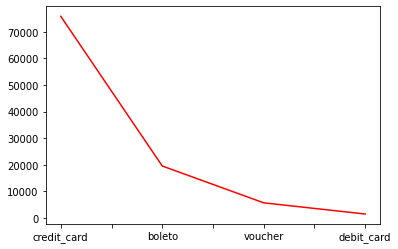

In [26]:
# E como seria possível exibir o tipo de pagamento de forma visual?
transacoes_tipo.plot(color='red');

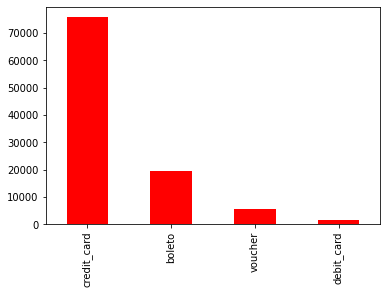

In [27]:
# E se eu quiser mostrar como um gráfico de barras?
transacoes_tipo.plot.bar(color='red');

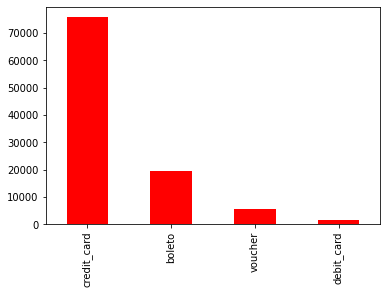

In [28]:
# E podemos salvar isso como imagem para então colocar em um Power Point

# Primeiro vamos importar o matplotlib
import matplotlib.pyplot as plt

# E então salvar essa figura
transacoes_tipo.plot.bar(color='red');
plt.savefig('transacoes_tipo')

Podemos também ajustar os parâmetros da imagem

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

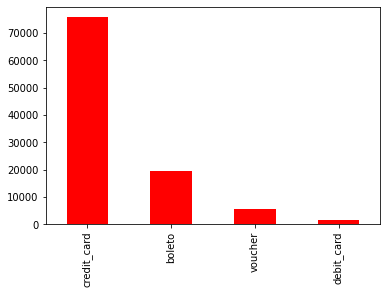

In [29]:
# Podemos ajustar a figura que exportamos e retirar os fundos
transacoes_tipo.plot.bar(color='red');
plt.savefig('transacoes_tipo',bbox_inches='tight',transparent=True)

In [30]:
# Agora vamos usar o .value_counts() com o número de parcelas
pagamentos.payment_installments.value_counts()

1     51817
2     12255
3     10335
4      7015
10     5247
5      5184
8      4232
6      3872
7      1598
9       637
12      132
15       72
18       27
11       22
24       18
20       17
13       15
14       15
17        7
16        4
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [31]:
# Vamos novamente visualizar a base
pagamentos.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,credit_card,3,179.12


In [32]:
# Vamos, antes de fazer o .value_counts(), filtrar a base apenas para transações em crédito
pagamentos.loc[pagamentos.payment_type == 'credit_card']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,credit_card,3,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,1,credit_card,1,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,1,credit_card,1,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,2017-07-09,2017-07-11,2017-07-26,2017-08-01,1,credit_card,6,175.26
...,...,...,...,...,...,...,...,...,...,...,...,...
102522,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23,2017-02-23,2017-03-01,2017-03-06,2017-03-22,1,credit_card,3,155.99
102523,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28,1,credit_card,3,85.08
102524,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,1,credit_card,3,195.00
102525,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,1,credit_card,5,271.01


In [33]:
# Agora vamos pegar apenas a coluna de número de parcelas
pagamentos.loc[pagamentos.payment_type == 'credit_card','payment_installments']

0         1
4         3
5         1
6         1
7         6
         ..
102522    3
102523    3
102524    3
102525    5
102526    4
Name: payment_installments, Length: 75809, dtype: int64

In [34]:
# E só então fazer o .value_counts()
pagamentos.loc[pagamentos.payment_type == 'credit_card','payment_installments'].value_counts()

1     25098
2     12255
3     10335
4      7015
10     5247
5      5184
8      4232
6      3872
7      1598
9       637
12      132
15       72
18       27
11       22
24       18
20       17
13       15
14       15
17        7
16        4
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [35]:
# Para visualizar melhor podemos ordenar pelo index usando o .sort_index()
pagamento_parcelado = pagamentos.loc[pagamentos.payment_type == 'credit_card','payment_installments'].value_counts().sort_index()

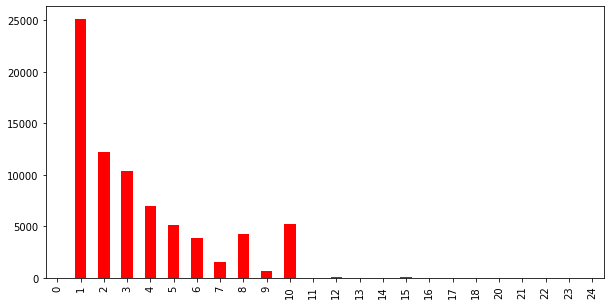

In [36]:
# Podemos também visualizar de forma gráfica
pagamento_parcelado.plot.bar(figsize=(10,5), color= 'red');

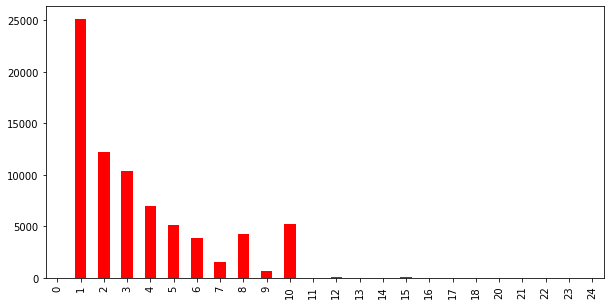

In [37]:
# E exportar essa figura
pagamento_parcelado.plot.bar(figsize=(10,5), color='red');
plt.savefig('transacoes_parcelas',bbox_inches='tight',transparent=True)

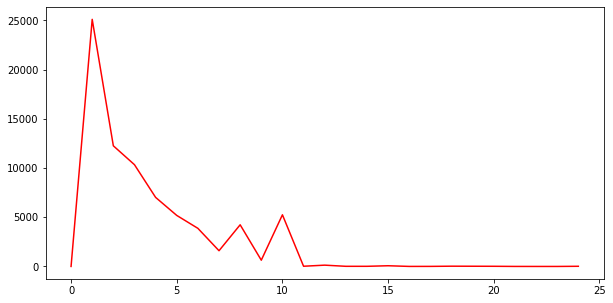

In [38]:
# E exportar essa figura 'linha'
pagamento_parcelado.plot(figsize=(10,5), color='red');
plt.savefig('transacoes_parcelas',bbox_inches='tight',transparent=True)

In [39]:
# Como eu poderia calcular o % de cada quantidade de parcelas?

# Salvando o total de transações parceladas em uma variável
total_parcelado = pagamento_parcelado.sum()

# E o número de parcelas em outra
pagamento_parcelado

# Visualizando em %
round((pagamento_parcelado/total_parcelado)*100,2)

0      0.00
1     33.11
2     16.17
3     13.63
4      9.25
5      6.84
6      5.11
7      2.11
8      5.58
9      0.84
10     6.92
11     0.03
12     0.17
13     0.02
14     0.02
15     0.09
16     0.01
17     0.01
18     0.04
20     0.02
21     0.00
22     0.00
23     0.00
24     0.02
Name: payment_installments, dtype: float64

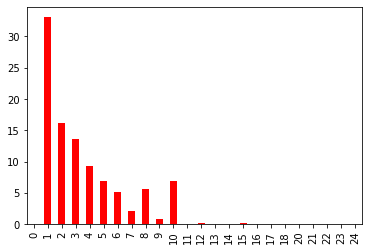

In [40]:
# E também podemos visualizar esse valor de forma gráfica
round((pagamento_parcelado/total_parcelado)*100,2).plot.bar(color='red');

In [41]:
# Relembrando, verificando a quantidade comprada
pagamentos.payment_value.count()

102528

In [42]:
# E agora vendo o valor total da compra
pagamentos.payment_value.sum()

15821063.889999997

In [43]:
# Calculando o valor médio da parcela
pagamentos.payment_value.sum()/pagamentos.payment_value.count()

154.30968993835828

In [44]:
# Calculando diretamente a média
pagamentos.payment_value.mean()

154.30968993835828

In [45]:
pagamentos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,credit_card,3,179.12


In [46]:
# Qual seria a média por tipo de pagamento?
pagamentos.groupby('payment_type')['payment_value'].mean()


payment_type
boleto         145.430333
credit_card    163.530169
debit_card     143.290572
voucher         64.838404
Name: payment_value, dtype: float64

In [47]:
# Qual seria o valor total por tipo de pagamento?
pagamentos.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

payment_type
credit_card    12397058.59
boleto          2842144.99
voucher          368930.52
debit_card       212929.79
Name: payment_value, dtype: float64

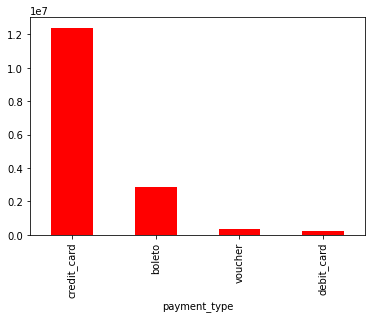

In [48]:
# Visualizando de forma gráfica
pagamentos.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).plot.bar(color='red');

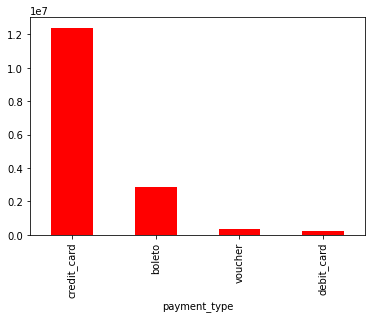

In [49]:
# Exportando esse visual
pagamentos.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).plot.bar(color='red');
plt.savefig('transacoes_valor',bbox_inches='tight',transparent=True)

In [50]:
pagamentos.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59


In [51]:
# Será que a média em 10 parcelas é maior que nos outros parcelamentos?
pagamentos[pagamentos.payment_type == 'credit_card'].groupby('payment_installments')['payment_value'].mean()

payment_installments
0      94.315000
1      96.133129
2     127.260781
3     142.776074
4     164.268574
5     183.344851
6     210.148698
7     188.499869
8     308.104910
9     203.799953
10    414.834061
11    125.478636
12    323.144470
13    151.318000
14    167.962667
15    451.722083
16    285.677500
17    174.224286
18    486.483333
20    615.801765
21    243.700000
22    228.710000
23    236.480000
24    610.048889
Name: payment_value, dtype: float64

Sobre as vendas

In [52]:
# Visualizando novamente a base
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08


In [53]:
# Verificando se existem valores nulos
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 115
order_delivered_carrier_date     1873
order_delivered_customer_date    3119
order_estimated_delivery_date       0
order_item_id                     717
product_id                        717
seller_id                         717
shipping_limit_date               717
price                             717
freight_value                     717
product_category_name            2315
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
dtype: int64

In [54]:
# Verificando a soma do preço pago pelo cliente
preco = vendas.price.sum()

In [55]:
# Relembrando a soma do valor total na base de pagamentos
pagamentos.payment_value.sum()

15821063.889999997

In [56]:
# Essa diferença é dada pelo frete?
frete = vendas.freight_value.sum()

In [57]:
# Somando esses dois valores
preco+frete

15666482.600000001